## Importing, opening, and saving all the images in dictionaries 

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageFile
import pandas as pd

from scipy import stats
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
from skimage.draw import circle

import os
import glob

In [3]:
# Import the names of all images of type *.png using recursive glob function
experimental = []
control = []
for image in glob.glob("**\source_images\*.jpg", recursive = True):
    experimental.append(image)

# Convert the list of names to tuples for faster processing
experimental = tuple(experimental)

# Storing all image data as arrays into a dictionary with keys by number
exp_dict = {}
for counter, image in enumerate(experimental):
    exp_dict.setdefault(counter, np.array(Image.open(image)))


Plotting on a grid for fun

Your grid will have 1 rows and 3 columns


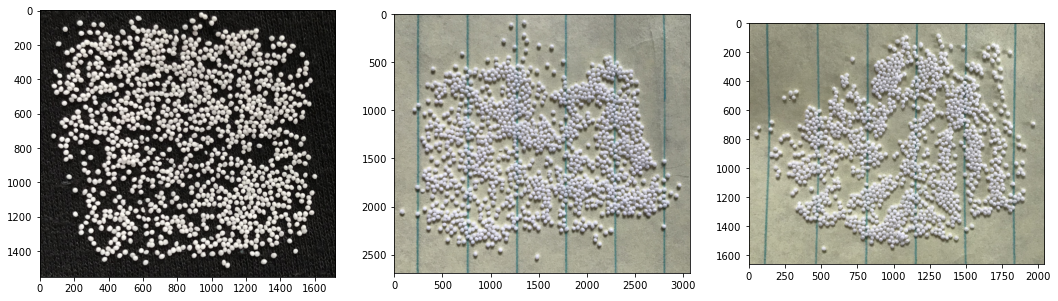

In [4]:
# Uncomment to plot all experimental images on a grid. It's not necessary, I did just for fun

fig = plt.figure(figsize=(18, 6))
rows = int(len(experimental)/10)+1
columns = 3

print(f"Your grid will have {rows} rows and {columns} columns")

for counter,image in enumerate(experimental):
    fig.add_subplot(rows, columns, counter+1)
    plt.imshow(exp_dict.get(counter))

plt.show()

## Identifying blobs in a sample image using difference of Gaussians

In [5]:
# Identifying beads using Difference of Gaussians (it's fast)
print('Identifying beads in sample image...')

beads = []
filtered_beads = []
image_gray = {}
image = {}
for counter, item in enumerate(experimental):
    # Normal image
    image.setdefault(counter, exp_dict.get(counter))

    # Convert image to grayscale
    image_gray.setdefault(counter, rgb2gray(image.get(counter)))

    # Difference of gaussians, compute radii in the 3rd column
    blobs_dog = blob_dog(image_gray.get(counter), min_sigma = 5, max_sigma=10, threshold=.3)
    blobs_dog[:, 2] = blobs_dog[:, 2] * np.sqrt(2)
    beads.append(blobs_dog)
    
    
    # Filtering beads
    print('Filtering all beads that are big enough...')
    filtered_beads_temp = []
    for counter, item in enumerate(blobs_dog):
        if item[2] > 5:
            filtered_beads_temp.append(item)

    print(f'Successfully filtered {len(filtered_beads_temp)} beads from a total of {len(blobs_dog)}')
    
    # Save the filtered beads for each image
    filtered_beads.append(filtered_beads_temp)
    
print('Done.')

Identifying beads in sample image...
Filtering all beads that are big enough...
Successfully filtered 1205 beads from a total of 1205
Filtering all beads that are big enough...
Successfully filtered 1327 beads from a total of 1327
Filtering all beads that are big enough...
Successfully filtered 1136 beads from a total of 1136
Done.


Plotting beads found using blob recognition... 
Done.


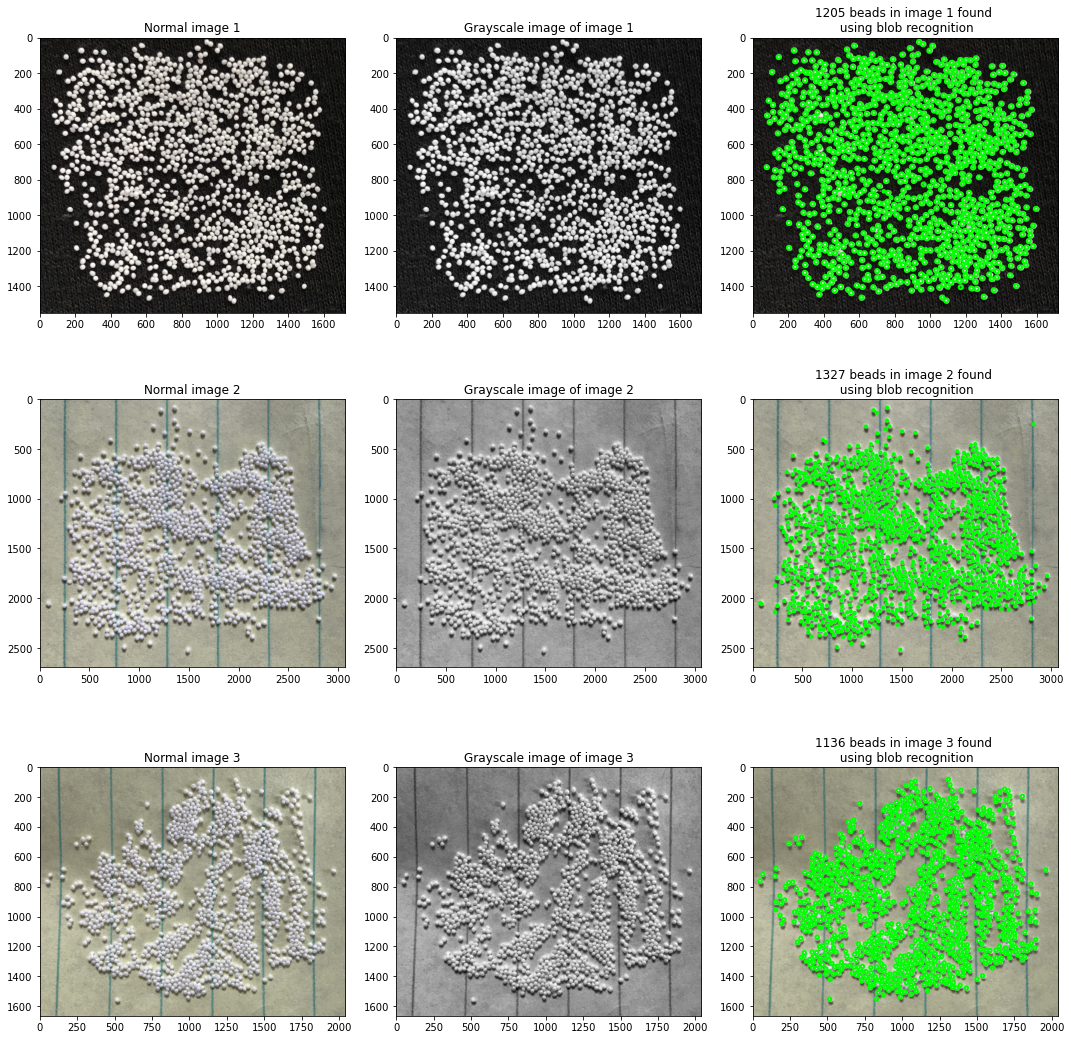

In [6]:
print('Plotting beads found using blob recognition... ')
fig, axes = plt.subplots(3,3,sharex=False, sharey=False, figsize=[15,15])

for counter, item in enumerate(experimental):
    # Plot normal image
    axes[counter, 0].set_title(f'Normal image {counter+1}')
    axes[counter, 0].imshow(image.get(counter))

    # Plot grayscale image
    axes[counter, 1].set_title(f'Grayscale image of image {counter+1}')
    axes[counter, 1].imshow(image_gray.get(counter),cmap="gray")
    
    # Plot detected beads
    axes[counter,2].set_title(f'{len(beads[counter])} beads in image {counter+1} found \n using blob recognition')
    axes[counter,2].imshow(image.get(counter))
    for bead in filtered_beads[counter]:
        y, x, r = bead
        c = plt.Circle((x, y), r, color='lime', linewidth=2, fill=False)
        axes[counter,2].add_patch(c)

plt.tight_layout()
plt.savefig("detected_beads/results.jpg")
print('Done.')

In [7]:
print(f'Done, the average numbers of beads is: {np.mean([1205,1327,1136]):20.0f}')

Done, the average numbers of beads is:                 1223
